In [ ]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**loading in the dataframes**

In [3]:
df=pd.read_csv("path/train.csv")

In [4]:
test = pd.read_csv('path/test.csv')

**exploratory analysis**

In [6]:
#General info about the train data, the columns, the number of rows, object types, null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4546 non-null   int64 
 1   RecipeNumber       4546 non-null   int64 
 2   RecipeCode         4546 non-null   int64 
 3   RecipeName         4546 non-null   object
 4   CommentID          4546 non-null   object
 5   UserID             4546 non-null   object
 6   UserName           4546 non-null   object
 7   UserReputation     4546 non-null   int64 
 8   CreationTimestamp  4546 non-null   int64 
 9   ReplyCount         4546 non-null   int64 
 10  ThumbsUpCount      4546 non-null   int64 
 11  ThumbsDownCount    4546 non-null   int64 
 12  BestScore          4546 non-null   int64 
 13  Recipe_Review      4546 non-null   object
dtypes: int64(9), object(5)
memory usage: 497.3+ KB


In [7]:
# To get some insight into the range of values
df.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [54]:
#Removing null entries
print(df.shape)
print("Train Data Missing Values:\n", df.isnull().sum())
print("\nTest Data Missing Values:\n", test.isnull().sum())
df.dropna(inplace=True)
test.dropna(inplace=True)
print("\nTrain Data Missing Values after removing null:\n", df.isnull().sum())
print("\nTest Data Missing Values after removing null:\n", test.isnull().sum())


(13636, 15)
Train Data Missing Values:
 ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

Test Data Missing Values:
 ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

Train Data Missing Values after removing null:
 ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
Creati

In [9]:
#Understand distribution of train data to identify data imbalance
df["Rating"].value_counts()

Rating
5    10369
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

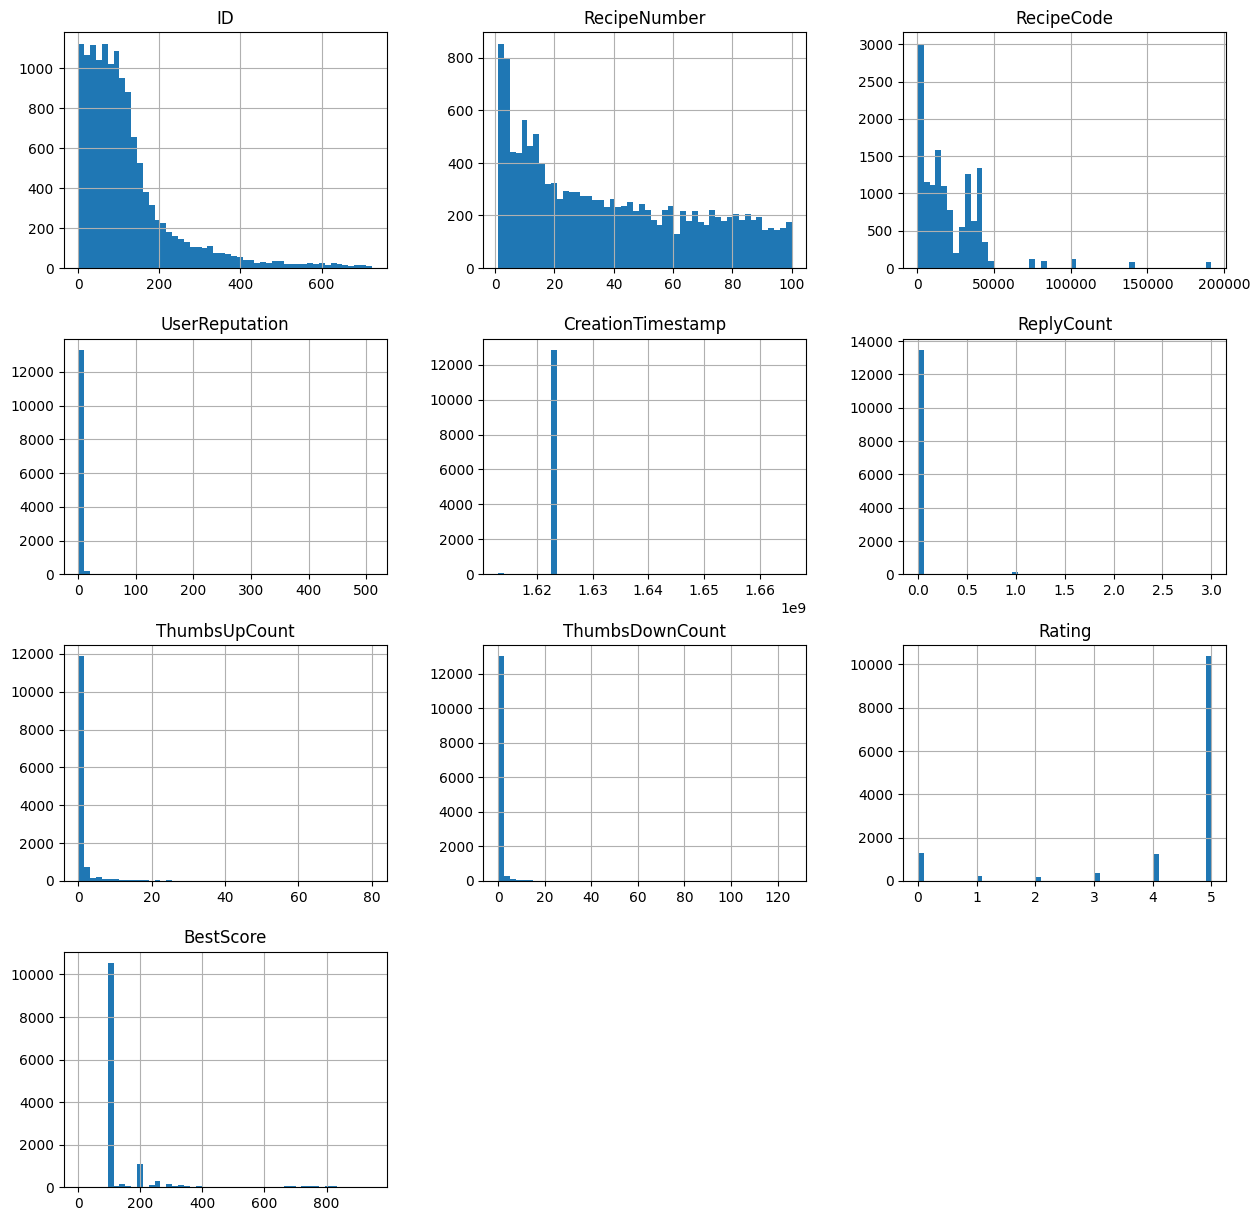

In [10]:
#Visualise distributions for better understanding
import seaborn as sns
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(15,15))
# display histogram
plt.show()

In [6]:
#Understanding which variables strongle affect Rating
exploration_set = df[["RecipeNumber","UserReputation","CreationTimestamp","ReplyCount","ThumbsUpCount","ThumbsDownCount","BestScore","Rating"]]
corr_matrix = exploration_set.corr()
print(corr_matrix["Rating"])

RecipeNumber        -0.043127
UserReputation       0.015038
CreationTimestamp   -0.061216
ReplyCount          -0.124860
ThumbsUpCount       -0.051752
ThumbsDownCount     -0.142273
BestScore           -0.036719
Rating               1.000000
Name: Rating, dtype: float64


In [7]:
print(corr_matrix)

                   RecipeNumber  UserReputation  CreationTimestamp  \
RecipeNumber           1.000000        0.022084           0.034022   
UserReputation         0.022084        1.000000           0.174215   
CreationTimestamp      0.034022        0.174215           1.000000   
ReplyCount             0.026537        0.014045           0.171517   
ThumbsUpCount          0.064797        0.053825           0.319297   
ThumbsDownCount        0.053027        0.023986           0.206646   
BestScore              0.086233        0.126701           0.681573   
Rating                -0.043127        0.015038          -0.061216   

                   ReplyCount  ThumbsUpCount  ThumbsDownCount  BestScore  \
RecipeNumber         0.026537       0.064797         0.053027   0.086233   
UserReputation       0.014045       0.053825         0.023986   0.126701   
CreationTimestamp    0.171517       0.319297         0.206646   0.681573   
ReplyCount           1.000000       0.220929         0.293614   0

**Preparing data for model**

In [18]:
labels = df['Rating']

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(df, labels):
    X_tr, X_ts = df.iloc[train_index], df.iloc[test_index]
    y_tr, y_ts = labels[train_index], labels[test_index]
print("X_train:", X_tr.shape)
print("y_train:", y_tr.shape)
print("X_test:", X_ts.shape)
print("y_test:", y_ts.shape)


X_train: (10907, 15)
y_train: (10907,)
X_test: (2727, 15)
y_test: (2727,)


In [56]:
#One hot encoding RecipeName column, generates a separate column for each value
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
recipe_names = X_tr['RecipeName'].values.reshape(-1, 1)
encoded_recipe_names = ohe.fit_transform(recipe_names)
encoded_recipe_names_df = pd.DataFrame(encoded_recipe_names.toarray(), columns=ohe.get_feature_names_out(['RecipeName']))
train_reset_index = X_tr.reset_index(drop=True)
train_encoded = pd.concat([train_reset_index.drop(columns=['RecipeName', 'Rating']), encoded_recipe_names_df], axis=1)

recipe_names_val= X_ts['RecipeName'].values.reshape(-1, 1)
encoded_recipe_names = ohe.transform(recipe_names_val)
encoded_recipe_names_val = pd.DataFrame(encoded_recipe_names.toarray(), columns=ohe.get_feature_names_out(['RecipeName']))
val_reset_index = X_ts.reset_index(drop=True)
val_encoded = pd.concat([val_reset_index.drop(columns=['RecipeName', 'Rating']), encoded_recipe_names_val], axis=1)

recipe_names_test= test['RecipeName'].values.reshape(-1, 1)
encoded_recipe_names = ohe.transform(recipe_names_test)
encoded_recipe_names_test = pd.DataFrame(encoded_recipe_names.toarray(), columns=ohe.get_feature_names_out(['RecipeName']))
test_reset_index = test.reset_index(drop=True)
test_encoded = pd.concat([test_reset_index.drop(columns=['RecipeName']), encoded_recipe_names_test], axis=1)

# # test_reset_index = test.reset_index(drop=True)
# test_encoded = pd.concat([test_reset_index.drop(columns=['RecipeName']), encoded_recipe_names_df.iloc[len(df_reset_index):].reset_index(drop=True)], axis=1)


In [57]:
#Checking that it is correctly divided
print(train_encoded.shape)
print(val_encoded.shape)
print(test_encoded.shape)

(10907, 113)
(2727, 113)
(4546, 113)


In [58]:
df=train_encoded
test=test_encoded
val=val_encoded

In [59]:
#Cleaning the Recipe review column, removing all unecessary characters/words
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    stop_words = set(['and', 'the', 'is', 'it', 'a', 'an']) 
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

df['Recipe_Review'] = df['Recipe_Review'].apply(clean_text)
test['Recipe_Review']=test['Recipe_Review'].apply(clean_text)
val['Recipe_Review']=val['Recipe_Review'].apply(clean_text)

In [60]:
#Extracting features from recipe reviews using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df['Recipe_Review'].astype(str)  
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df = df.drop(columns=['Recipe_Review'])
df = pd.concat([df, tfidf_df], axis=1)
print(df)

        ID  RecipeNumber  RecipeCode  \
0      132            43       33457   
1      103            45       41384   
2      109            12       19731   
3       76            41       35948   
4       99            36        1196   
...    ...           ...         ...   
10902  118            55       38550   
10903  135             2        3309   
10904    1            99      191775   
10905  359            13       32480   
10906  145            64       12700   

                                              CommentID  \
0                            sp_aUSaElGf_33457_c_375216   
1                            sp_aUSaElGf_41384_c_369568   
2                            sp_aUSaElGf_19731_c_411161   
3                            sp_aUSaElGf_35948_c_256501   
4                             sp_aUSaElGf_1196_c_349694   
...                                                 ...   
10902                        sp_aUSaElGf_38550_c_178371   
10903                         sp_aUSaElGf_3309_

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus_val = val['Recipe_Review'].astype(str) 
val_tfidf = tfidf_vectorizer.transform(corpus_val)
val_tfidf_df = pd.DataFrame(val_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
val = val.drop(columns=['Recipe_Review'])
val = pd.concat([val, val_tfidf_df], axis=1)
print(val.head)

<bound method NDFrame.head of        ID  RecipeNumber  RecipeCode                   CommentID  \
0     232            11       12003  sp_aUSaElGf_12003_c_304859   
1     124            86        4383   sp_aUSaElGf_4383_c_118299   
2      92             8        6086   sp_aUSaElGf_6086_c_392554   
3     215            11       12003  sp_aUSaElGf_12003_c_129194   
4       9            44       31278  sp_aUSaElGf_31278_c_417518   
...   ...           ...         ...                         ...   
2722  153            12       19731  sp_aUSaElGf_19731_c_345034   
2723   35            85       39334  sp_aUSaElGf_39334_c_117566   
2724  111            38        1063   sp_aUSaElGf_1063_c_233426   
2725  101            22        1081   sp_aUSaElGf_1081_c_196486   
2726   47            44       31278  sp_aUSaElGf_31278_c_188268   

                             UserID      UserName  UserReputation  \
0     u_1oKWrFPYvmUSsrtJUssaHSlNpET     Katrina87               1   
1     u_1oKW2hs4CaXqXLD6i4o

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus_test = test['Recipe_Review'].astype(str) 
test_tfidf = tfidf_vectorizer.transform(corpus_test)
test_tfidf_df = pd.DataFrame(test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
test = test.drop(columns=['Recipe_Review'])
test = pd.concat([test, test_tfidf_df], axis=1)
print(test.head)


<bound method NDFrame.head of        ID  RecipeNumber  RecipeCode                   CommentID  \
0      86            45       41384  sp_aUSaElGf_41384_c_341929   
1     102            53        3143   sp_aUSaElGf_3143_c_274545   
2     156            53        3143   sp_aUSaElGf_3143_c_398512   
3      18            89        1324   sp_aUSaElGf_1324_c_431662   
4      27            70       32264  sp_aUSaElGf_32264_c_423935   
...   ...           ...         ...                         ...   
4541  152            32       17310  sp_aUSaElGf_17310_c_310012   
4542  121            74       26937  sp_aUSaElGf_26937_c_331905   
4543  133            73       41095  sp_aUSaElGf_41095_c_112060   
4544   91            12       19731  sp_aUSaElGf_19731_c_391682   
4545   72            93       42873  sp_aUSaElGf_42873_c_113484   

                             UserID             UserName  UserReputation  \
0     u_1oKc4U6bh65cEli8Z8eTIf98Vpr            kalloween               1   
1     u_1oKW5

In [63]:
#Dropping all the irrelevant Categorical columns
X_train=df.drop(['ID','RecipeCode','CommentID','UserID','UserName','CreationTimestamp'],axis=1)
Y_train=y_tr
X_val=val.drop(['ID','RecipeCode','CommentID','UserID','UserName','CreationTimestamp'],axis=1)
Y_val=y_ts
X_test=test.drop(['ID','RecipeCode','CommentID','UserID','UserName','CreationTimestamp'],axis=1)

In [37]:
X_train.columns

Index(['RecipeNumber', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'BestScore',
       'RecipeName_Amish Breakfast Casserole', 'RecipeName_Apple Pie',
       'RecipeName_Asian Chicken Thighs',
       ...
       'zucchinisquash', 'zucchiniworks', 'zucchiniyou', 'zuchiini', 'zuchini',
       'zuchinni', 'zuke', '¼inch', '½amp½', '⅛inch'],
      dtype='object', length=12460)

In [38]:
X_val.columns

Index(['RecipeNumber', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'BestScore',
       'RecipeName_Amish Breakfast Casserole', 'RecipeName_Apple Pie',
       'RecipeName_Asian Chicken Thighs',
       ...
       'zucchinisquash', 'zucchiniworks', 'zucchiniyou', 'zuchiini', 'zuchini',
       'zuchinni', 'zuke', '¼inch', '½amp½', '⅛inch'],
      dtype='object', length=12460)

In [39]:
X_test.columns

Index(['RecipeNumber', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'BestScore',
       'RecipeName_Amish Breakfast Casserole', 'RecipeName_Apple Pie',
       'RecipeName_Asian Chicken Thighs',
       ...
       'zucchinisquash', 'zucchiniworks', 'zucchiniyou', 'zuchiini', 'zuchini',
       'zuchinni', 'zuke', '¼inch', '½amp½', '⅛inch'],
      dtype='object', length=12460)

In [64]:
#Bringing all numerical columns to same scale and using a pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']

categorical_features = X_train.columns.difference(numerical_features)

scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', 'passthrough', categorical_features)
    ])

X_train_scaled = pd.DataFrame(preprocessor.fit_transform(X_train), columns=numerical_features + list(categorical_features))
X_val_scaled = pd.DataFrame(preprocessor.transform(X_val), columns=numerical_features + list(categorical_features))
X_test_scaled = pd.DataFrame(preprocessor.transform(X_test), columns=numerical_features + list(categorical_features))

In [41]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)
print(X_val_scaled.shape)

(4546, 12460)
(10907, 12460)
(2727, 12460)


In [43]:
print(Y_train.shape)
print(Y_val.shape)

(10907,)
(2727,)


In [ ]:
# print("train Data null:\n", X_tr.isnull().sum())
# print("\ntest Data null:\n", X_ts.isnull().sum())

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors = 18)
# model.fit(X_train_scaled, Y_train)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier()
# clf.fit(X_train_scaled, Y_train)

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# model_dt = DecisionTreeClassifier()
# model_bag = BaggingClassifier(base_estimator=model_dt, n_estimators=10, random_state=42)
# model_bag.fit(X_train_scaled, Y_train)

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# model_dt= DecisionTreeClassifier(max_depth=1)  
# model_boost = AdaBoostClassifier(base_estimator=model_dt, n_estimators=50, random_state=42)
# model_boost.fit(X_train_scaled, Y_train)

In [ ]:
# from sklearn.neural_network import MLPClassifier
# model_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=400, random_state=42)
# model_mlp.fit(X_train_scaled, Y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

**using imblearn to undersample**

In [74]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, Y_rus = rus.fit_resample(X_train_scaled, Y_train)

In [75]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=5000,)
logistic_regression.fit(X_rus, Y_rus)

accuracy_logistic_regression = logistic_regression.score(X_val_scaled, Y_val)
print("Accuracy of logistic regression on test set:", accuracy_logistic_regression)

Accuracy of logistic regression on test set: 0.40704070407040704


In [65]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=5000,)
logistic_regression.fit(X_train_scaled, Y_train)

accuracy_logistic_regression = logistic_regression.score(X_val_scaled, Y_val)
print("Accuracy of logistic regression on test set:", accuracy_logistic_regression)

Accuracy of logistic regression on test set: 0.7788778877887789


In [66]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
val_predictions=logistic_regression.predict(X_val_scaled)
print(accuracy_score(Y_val, val_predictions))
# print(precision_score(Y_val, val_predictions))
# print(recall_score(Y_val, val_predictions))

0.7788778877887789


In [67]:
confusion_matrix(Y_val,val_predictions)

array([[  37,    2,    2,    5,    3,  189],
       [   5,    6,    1,    2,    3,   24],
       [   2,    4,    0,    3,   11,   20],
       [   8,    0,    0,    9,   13,   48],
       [   6,    1,    0,    1,   26,  214],
       [  19,    0,    0,    1,   16, 2046]])

In [68]:
predictions = logistic_regression.predict(X_test_scaled)

In [ ]:

# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# param_grid = {'n_neighbors': [1,8,18,28,38,48]}
# knn = KNeighborsClassifier()
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_tr, y_tr)

# print("Best value of k:", grid_search.best_params_)


In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_neighbors': range(1,10)}
# knn = KNeighborsClassifier()
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_tr, Yy_tr)
# print("Best value of k:", grid_search.best_params_)

In [ ]:
# best_knn=KNeighborsClassifier(n_neighbors = 28)
# best_knn.fit(X_tr, y_tr)

In [ ]:
# from sklearn import svm
# model_svm = svm.SVC()
# model_svm.fit(X_tr, y_tr)